In [560]:
#Import modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [561]:
#Go to the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [562]:
#import os 


Gradient function is correct


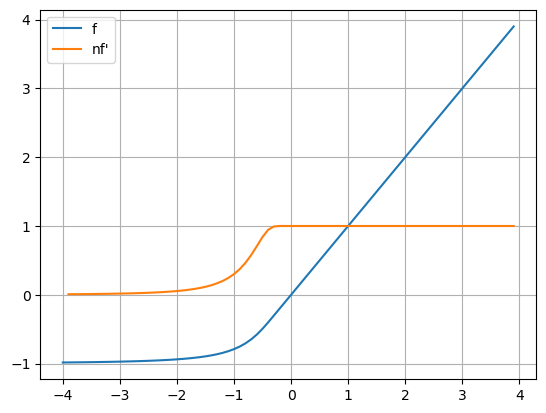

Using device: cuda


In [571]:
#Import local modules 
%run CurrentCode/Model2.ipynb
%run CurrentCode/actFunctions2.ipynb
%run CurrentCode/DeviceDataLoader2.ipynb

In [572]:
actFuncList = [erfMinus, erfPlus, erfPlus2, erfPlus3, erfRelu, squarePlus, nn.ReLU, nn.Softplus, nn.GELU, degreePlus] 

actFunc = actFuncList[1]

In [573]:
#Make the model with the respective params and put it into your GPU/CPU device 
torch.manual_seed(1)
model = ResNet(block=ResidualBlock, img_input_dim=28, layers=50, actFunc=actFunc)

model = to_device(model, device)

In [574]:
history = []
LR = [0.2, 0.1, 0.05, 0.025]
#test fit the model to see if it works well 
print(model)

ResNet(
  (encoder): Linear(in_features=784, out_features=64, bias=True)
  (input_actFunc): erfPlus()
  (hid_layers): Sequential(
    (0): ResidualBlock(
      (FC1): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): erfPlus()
      )
      (FC2): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (actFunc1): erfPlus()
    )
    (1): ResidualBlock(
      (FC1): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): erfPlus()
      )
      (FC2): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, b

In [575]:
#Fit the model 
for i in range(len(LR)):
    history += model.fit(epochs=5, lr=LR[i], mo=0.1, train_loader=train_loader, val_loader=val_loader)

Epoch [0] val_loss: 1.6781, val_acc: 0.7833, time: 7.6737 s
Epoch [1] val_loss: 1.6412, val_acc: 0.8208, time: 7.4593 s
Epoch [2] val_loss: 1.6302, val_acc: 0.8312, time: 7.8699 s
Epoch [3] val_loss: 1.6149, val_acc: 0.8463, time: 7.6393 s
Epoch [4] val_loss: 1.6476, val_acc: 0.8129, time: 7.6232 s
-----------------------------------------------------
Epoch [0] val_loss: 1.6106, val_acc: 0.8496, time: 7.6494 s
Epoch [1] val_loss: 1.6010, val_acc: 0.8598, time: 7.6758 s
Epoch [2] val_loss: 1.6037, val_acc: 0.8572, time: 7.5541 s
Epoch [3] val_loss: 1.6059, val_acc: 0.8545, time: 7.8175 s
Epoch [4] val_loss: 1.6064, val_acc: 0.8546, time: 7.5301 s
-----------------------------------------------------
Epoch [0] val_loss: 1.5915, val_acc: 0.8695, time: 7.5295 s
Epoch [1] val_loss: 1.5904, val_acc: 0.8702, time: 7.4460 s
Epoch [2] val_loss: 1.5936, val_acc: 0.8667, time: 7.5820 s
Epoch [3] val_loss: 1.5928, val_acc: 0.8682, time: 7.5347 s
Epoch [4] val_loss: 1.5920, val_acc: 0.8689, time: 7

2.082247847654348


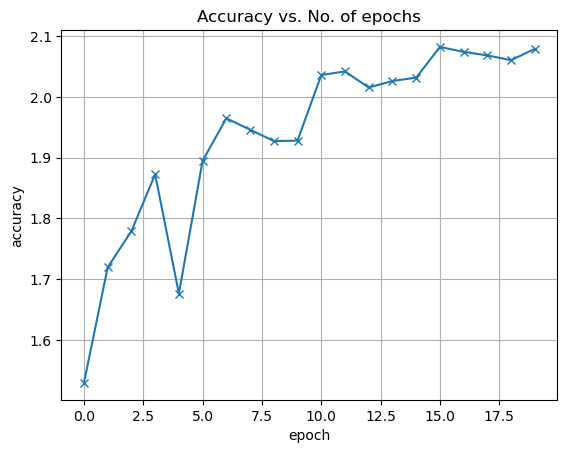

In [576]:
accuracies = [x['val_acc'] for x in history]
plt.plot(-np.log(1-np.array(accuracies)), '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')
plt.grid()
print(max(-np.log(1-np.array(accuracies))))

Text(0.5, 1.0, 'Time per epoch')

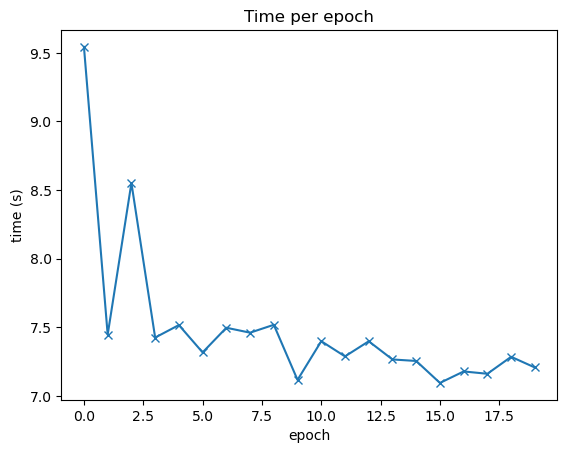

In [569]:
time = [x['epoch_time'] for x in history]
plt.plot(time, '-x')
plt.xlabel('epoch')
plt.ylabel('time (s)')
plt.title('Time per epoch')


In [570]:
np.mean(time), np.std(time)

(np.float64(7.4969880938529965), np.float64(0.5550599280562318))